## KMeans clustering

In [1]:
# kmeans_model.py
import pandas as pd
import os
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define features
features = [
    'danceability', 'energy', 'key', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Load dataset
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
file_path = os.path.join(parent_dir, "data", "spotify_cleaned.csv")
kmeans_model_cleaned = pd.read_csv(file_path)


kmeans_model_cleaned.head(5)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


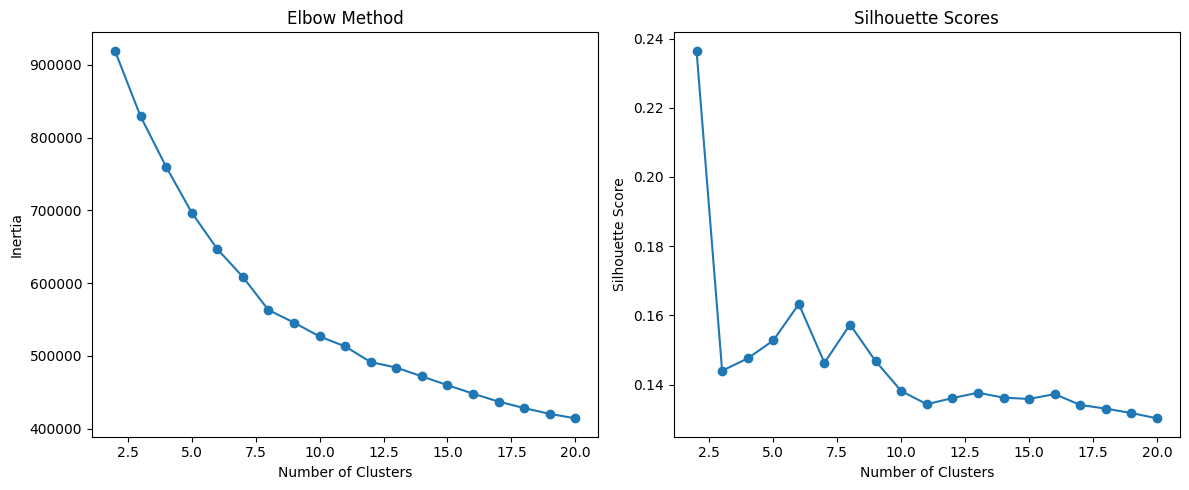

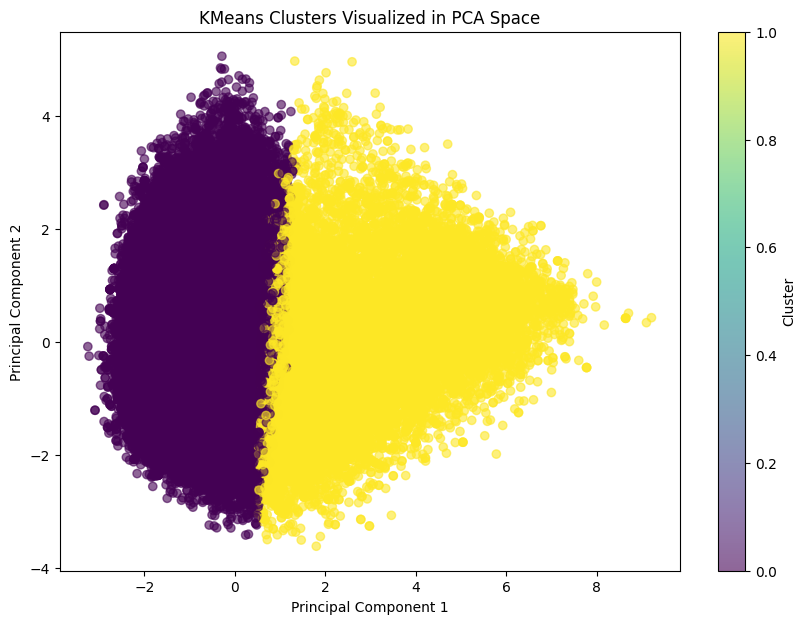

                  artists                                         album_name  \
0             Gen Hoshino                                             Comedy   
1            Ben Woodward                                   Ghost (Acoustic)   
2  Ingrid Michaelson;ZAYN                                     To Begin Again   
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...   
4        Chord Overstreet                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.

In [3]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(kmeans_model_cleaned[features])

# Hyperparameter tuning for the number of clusters
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 21)  # Adjust as necessary

for n_clusters in range_n_clusters:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(X)
    
    inertia.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the Elbow Method and Silhouette Scores
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because index starts at 0

# Train the final KMeans Model with optimal clusters
final_kmeans_model = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_model_cleaned['cluster'] = final_kmeans_model.fit_predict(X)

# Save the scaler and KMeans model separately
model_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'models'))
scaler_path = os.path.join(model_dir, 'StandardScaler.pkl')
model_path = os.path.join(model_dir, 'kmeans_model.pkl')

joblib.dump(scaler, scaler_path)
joblib.dump(final_kmeans_model, model_path)

# Save the clustered training data
kmeans_model_cleaned.to_csv("kmeans_model_data.csv", index=False)

# Optional: Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_model_cleaned['cluster'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clusters Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

print(kmeans_model_cleaned.head(5))